In [1]:
from inference import run_bayesian_inference

import matplotlib.pyplot as plt

/home/roi/anaconda3/envs/satellite/lib/python3.13/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/roi/anaconda3/envs/satellite/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mcmc = run_bayesian_inference()

--- 1. Generating Ground Truth Data ---
Precomputing ephemeris data...


Data generation complete.

--- 2. Running Bayesian Inference with NumPyro ---


sample: 100%|██████████| 3000/3000 [19:11<00:00,  2.61it/s, 1023 steps of size 3.16e-06. acc. prob=0.85]



--- 3. Inference Results ---


In [4]:
# Get samples from the posterior
mcmc_samples = mcmc.get_samples()
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
    logGam      1.03      0.00      1.03      1.03      1.03       nan       nan
     logKd     -2.72      0.00     -2.72     -2.72     -2.72      1.00      1.00
     logKp     -5.49      0.00     -5.49     -5.49     -5.49      1.00      1.00

Number of divergences: 0


In [5]:
mcmc_samples["Kd"].mean(), mcmc_samples["Kd"].std()

(Array(0.06583314, dtype=float32), Array(7.450581e-09, dtype=float32))

In [6]:
mcmc_samples["Kp"].mean(), mcmc_samples["Kp"].std()

(Array(0.00414585, dtype=float32), Array(4.656613e-10, dtype=float32))

In [7]:
mcmc_samples["gamma"].mean(), mcmc_samples["gamma"].std()

(Array(2.808669, dtype=float32), Array(2.3841858e-07, dtype=float32))

In [8]:
mcmc_samples["sigma"].mean(), mcmc_samples["sigma"].std()

KeyError: 'sigma'

In [9]:
import arviz as az

inf_data = az.from_numpyro(mcmc)

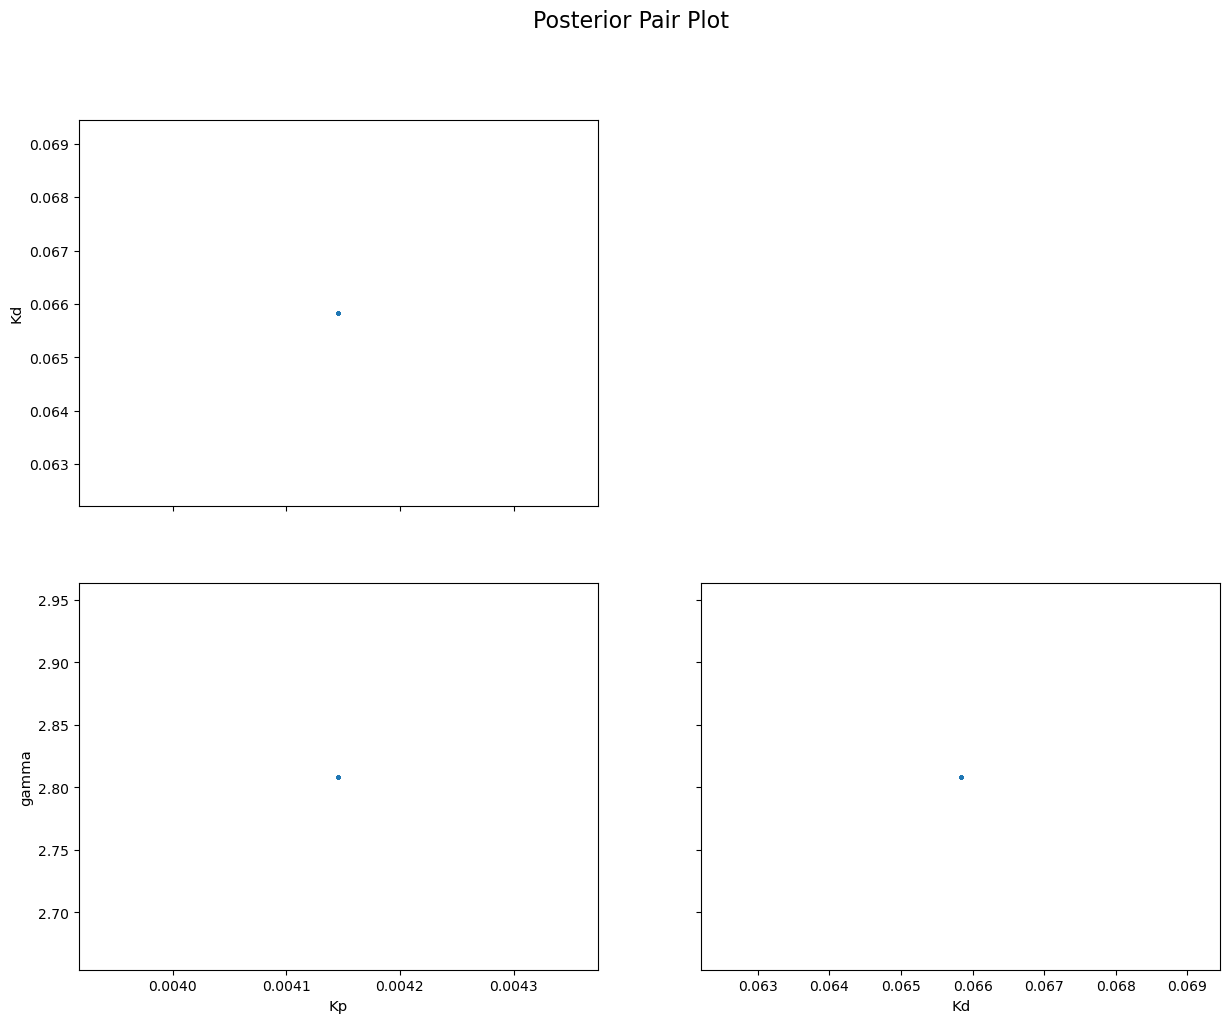

In [10]:
az.plot_pair(
    inf_data,
    var_names=["Kp", "Kd", "gamma"],
    kind="scatter",
    divergences=False,
    textsize=10
)
plt.suptitle("Posterior Pair Plot", fontsize=16)
plt.show()
